In [1]:
#%matplotlib notebook

In [2]:
import pandas as pd

import os
import matplotlib.pyplot as plt
from replace import desc_count


{'Race': 8, 'LGBTQ': 6, 'Religion': 2, 'Disablity': 0, 'Gender': 1, 'Unknown': 0}


In [3]:
hate_crime_data = os.path.join('..', 'Resources', 'hate_crime.csv')

hateCrimedf = pd.read_csv(hate_crime_data)

hateCrimedf.drop(columns=[

    'pub_agency_unit',
    'state_name',
    'population_group_code',
    'adult_victim_count',
    'juvenile_victim_count',
    'adult_offender_count',
    'juvenile_offender_count',
    'location_name',
    'multiple_offense',
    'multiple_bias',
    'ori',
    'agency_type_name',

], inplace=True)

hateCrimedf.reset_index(drop=True)

hateCrimedf


,incident_id,data_year,pug_agency_name,state_abbr,division_name,region_name,population_group_description,incident_date,total_offender_count,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,bias_desc,victim_types
0,43,1991,Pine Bluff,AR,West South Central,South,"Cities from 50,000 thru 99,999",1991-07-04,1,Black or African American,Not Specified,1,Aggravated Assault,1.0,Anti-Black or African American,Individual
1,44,1991,Pine Bluff,AR,West South Central,South,"Cities from 50,000 thru 99,999",1991-12-24,1,Black or African American,Not Specified,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Anti-White,Individual
2,45,1991,North Little Rock,AR,West South Central,South,"Cities from 50,000 thru 99,999",1991-07-10,1,Black or African American,Not Specified,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Anti-White,Individual
3,46,1991,North Little Rock,AR,West South Central,South,"Cities from 50,000 thru 99,999",1991-10-06,2,Black or African American,Not Specified,1,Intimidation,1.0,Anti-White,Individual
4,47,1991,Sevier,AR,West South Central,South,"Non-MSA counties under 10,000",1991-10-14,1,White,Not Specified,1,Intimidation,1.0,Anti-Black or African American,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241658,1473449,2022,Rock Springs,WY,Mountain,West,"Cities from 10,000 thru 24,999",2022-06-01,1,White,Hispanic or Latino,2,Simple Assault,2.0,Anti-White,Individual
241659,1473450,2022,University of Wyoming,WY,Mountain,West,"Cities under 2,500",2022-09-19,1,White,Not Hispanic or Latino,1,Intimidation,1.0,Anti-Gay (Male),Individual
241660,1476554,2022,Sweetwater,WY,Mountain,West,"Non-MSA counties under 10,000",2022-11-08,2,White,Multiple,2,Simple Assault,2.0,Anti-Hispanic or Latino,Individual
241661,1476555,2022,Cheyenne,WY,Mountain,West,"Cities from 50,000 thru 99,999",2022-11-15,8,White,Not Hispanic or Latino,1,Intimidation,1.0,Anti-Black or African American,Individual


In [4]:

grouped_crime = hateCrimedf.groupby('data_year')
grouped_crime

hateCrimedf['incident_date'] = pd.to_datetime(hateCrimedf['incident_date'])
hateCrimedf['bias_desc'].value_counts()

bias_desc
Anti-Black or African American                                                   81440
Anti-Jewish                                                                      29958
Anti-White                                                                       27115
Anti-Gay (Male)                                                                  23860
Anti-Hispanic or Latino                                                          15442
                                                                                 ...  
Anti-Heterosexual;Anti-Islamic (Muslim);Anti-Multiple Races, Group                   1
Anti-Black or African American;Anti-Native Hawaiian or Other Pacific Islander        1
Anti-Black or African American;Anti-Gay (Male);Anti-Gender Non-Conforming            1
Anti-Black or African American;Anti-Hispanic or Latino;Anti-Islamic (Muslim)         1
Anti-American Indian or Alaska Native;Anti-Female;Anti-Hispanic or Latino            1
Name: count, Length: 373, dtype: 

<Axes: xlabel='incident_date'>

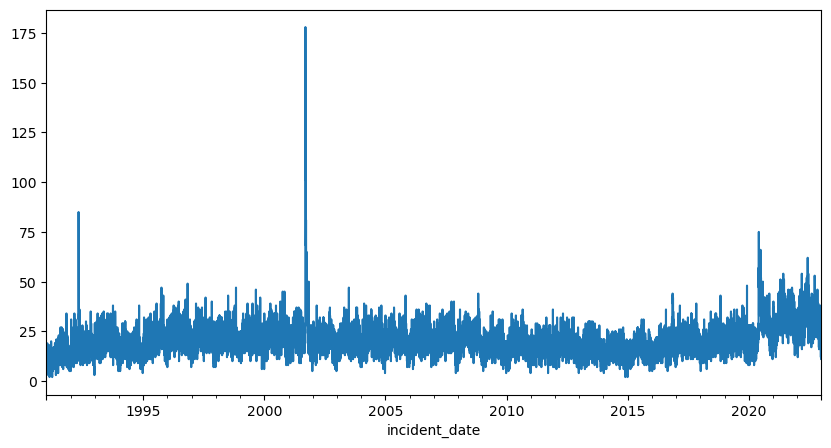

In [5]:
incident_date_all = hateCrimedf.groupby('incident_date').size()
incident_date_all.plot(kind='line', figsize=(10,5))

<Axes: title={'center': 'Hate Crime Activity In 1992'}, xlabel='incident_date'>

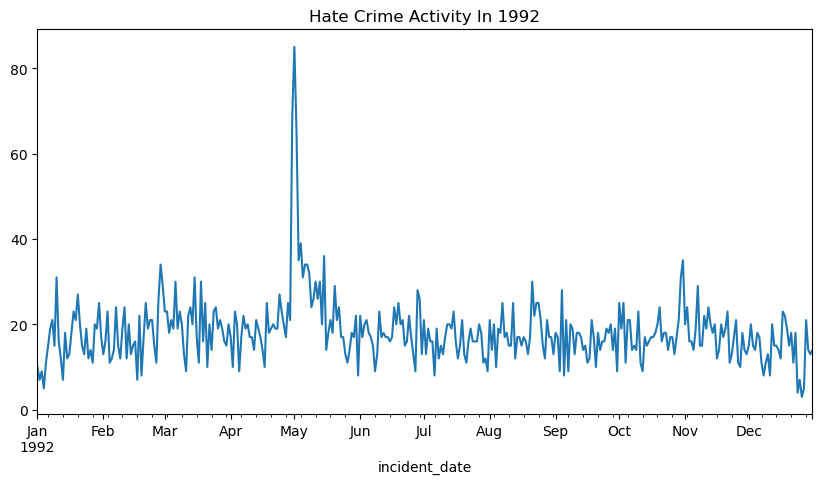

In [6]:
df1992 = hateCrimedf[hateCrimedf['data_year'] == 1992]
incident_date_1992 = df1992.groupby('incident_date').size()
incident_date_1992.plot(kind='line', figsize=(10,5), title='Hate Crime Activity In 1992')


<Axes: title={'center': 'Hate Crime Activity In 1995'}, xlabel='Months', ylabel='Incidents'>

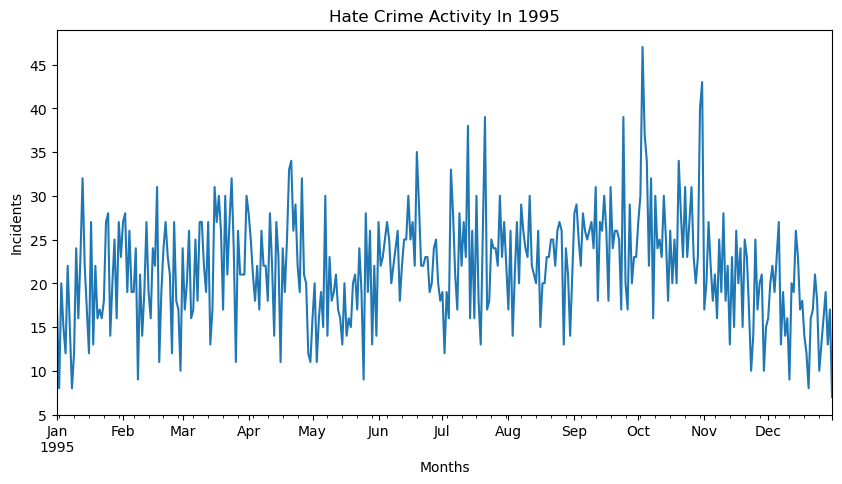

In [7]:
df1995 = hateCrimedf[hateCrimedf['data_year'] == 1995]
incident_date_1995 = df1995.groupby('incident_date').size()
incident_date_1995.plot(kind='line', figsize=(10,5), xlabel='Months', ylabel='Incidents', title='Hate Crime Activity In 1995')

<Axes: title={'center': 'Hate Crime Activity In 2001'}, xlabel='Months', ylabel='Incidents'>

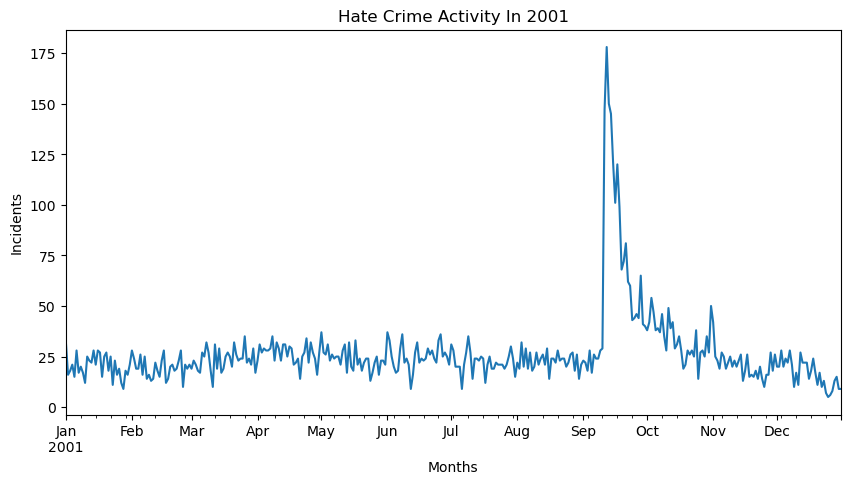

In [8]:
df2001 = hateCrimedf[hateCrimedf['data_year'] == 2001]
incident_date_2001 = df2001.groupby('incident_date').size()
incident_date_2001.plot(kind='line', figsize=(10,5), xlabel='Months', ylabel='Incidents', title='Hate Crime Activity In 2001')

In [9]:
hateCrimedf.dtypes

incident_id                              int64
data_year                                int64
pug_agency_name                         object
state_abbr                              object
division_name                           object
region_name                             object
population_group_description            object
incident_date                   datetime64[ns]
total_offender_count                     int64
offender_race                           object
offender_ethnicity                      object
victim_count                             int64
offense_name                            object
total_individual_victims               float64
bias_desc                               object
victim_types                            object
dtype: object

In [10]:
testdf = [i for i in list(hateCrimedf['bias_desc'])]

type(testdf)
desc_count(testdf)

{'Race': 154993,
 'LGBTQ': 40681,
 'Religion': 45001,
 'Disablity': 2249,
 'Gender': 692,
 'Unknown': 1}